# MetaStock Forecast

## import labraries

In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from prophet import Prophet



## import dataset and Expolatory Data anaylasis

In [31]:
data= pd.read_csv("data/meta.csv")
data.head()


,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,META,META,META,META,META,META
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,209.1502685546875,209.77999877929688,209.7899932861328,206.27000427246094,206.75,12077100
3,2020-01-03,208.04360961914062,208.6699981689453,210.39999389648438,206.9499969482422,207.2100067138672,11188400
4,2020-01-06,211.96180725097656,212.60000610351562,212.77999877929688,206.52000427246094,206.6999969482422,17058900


In [32]:
data.columns = ['Date','Adj Close' ,'Close', 'High', 'Low','Open' ,'Volume']
data.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,Ticker,META,META,META,META,META,META
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,209.1502685546875,209.77999877929688,209.7899932861328,206.27000427246094,206.75,12077100
3,2020-01-03,208.04360961914062,208.6699981689453,210.39999389648438,206.9499969482422,207.2100067138672,11188400
4,2020-01-06,211.96180725097656,212.60000610351562,212.77999877929688,206.52000427246094,206.6999969482422,17058900


In [33]:
data=data.iloc[2:]
data.reset_index(drop=True,inplace=True)

In [10]:
data.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2020-01-02,209.1502685546875,209.77999877929688,209.7899932861328,206.27000427246094,206.75,12077100
1,2020-01-03,208.04360961914062,208.6699981689453,210.39999389648438,206.9499969482422,207.2100067138672,11188400
2,2020-01-06,211.96180725097656,212.60000610351562,212.77999877929688,206.52000427246094,206.6999969482422,17058900
3,2020-01-07,212.42041015625,213.05999755859375,214.5800018310547,211.75,212.82000732421875,14912400
4,2020-01-08,214.57394409179688,215.22000122070312,216.24000549316406,212.61000061035156,213.0,13475000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       1006 non-null   object
 1   Adj Close  1006 non-null   object
 2   Close      1006 non-null   object
 3   High       1006 non-null   object
 4   Low        1006 non-null   object
 5   Open       1006 non-null   object
 6   Volume     1006 non-null   object
dtypes: object(7)
memory usage: 55.1+ KB


In [14]:
data.describe()

,Date,Adj Close,Close,High,Low,Open,Volume
count,1006,1006,1006,1006,1006,1006,1006
unique,1006,985,985,977,987,985,1006
top,2020-01-02,299.2489929199219,300.1499938964844,339.8999938964844,235.75,278.1400146484375,12077100
freq,1,2,2,3,2,3,1


In [29]:
print(data.isnull().sum())   
  


Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


In [30]:
print(data.duplicated().sum())

0


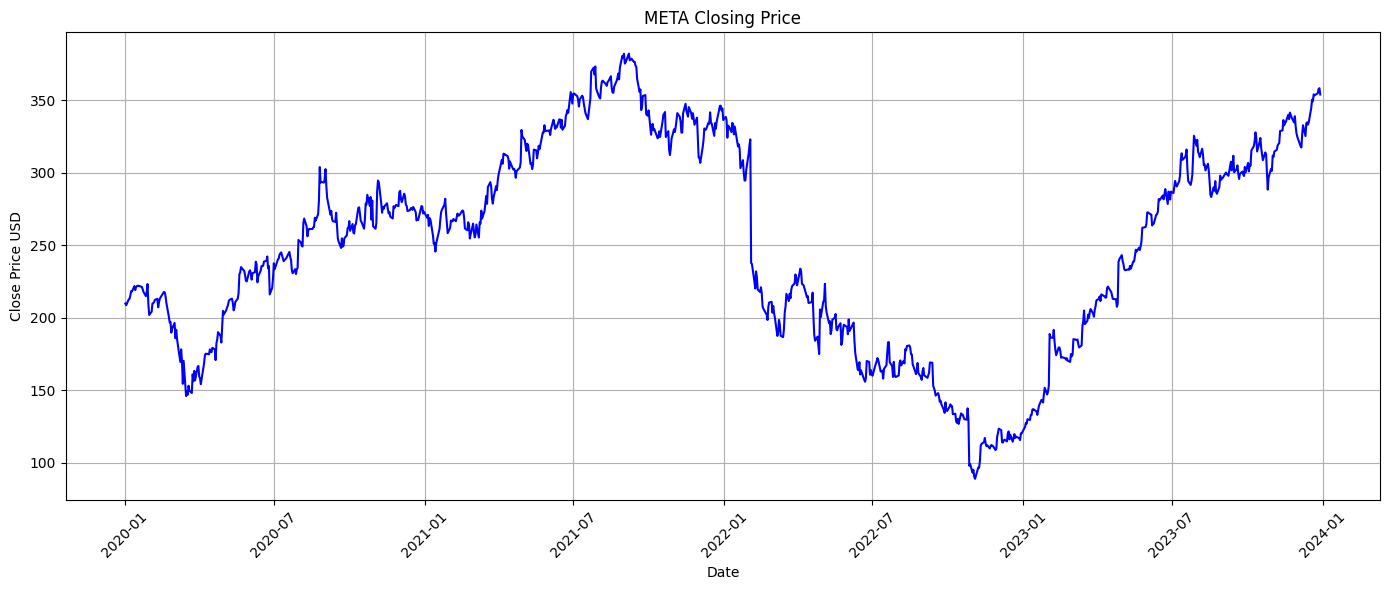

In [17]:

data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')
data = data.dropna(subset=['Date', 'Close'])
data = data.sort_values('Date')
data = data[(data['Close'] > 5) & (data['Close'] < 1000)]
plt.figure(figsize=(14, 6))
plt.plot(data['Date'], data['Close'], color='blue')
plt.title('META Closing Price')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



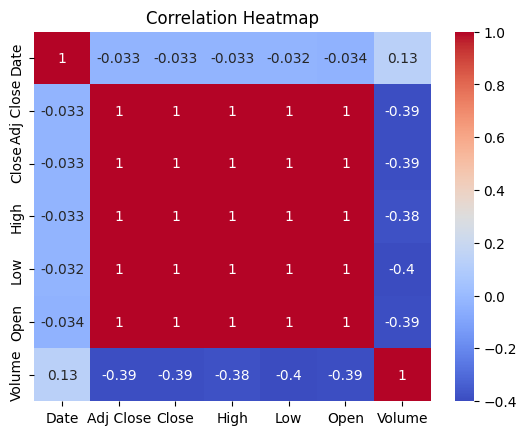

In [18]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


# Key Observations:
Perfect correlation (1.0) between price columns:

Adj Close, Close, High, Low, and Open all have values of 1, meaning they move almost identically — which is expected in stock market data.

Low correlation of Volume with price metrics:

Volume shows weak negative correlation (≈ -0.39) with prices, implying that as trading volume increases, prices slightly tend to decrease (or vice versa). However, this is not strong enough to infer causality.

Low correlation of Date:

Date shows very weak correlations (close to 0) with other columns because it's being treated as a numeric value and doesn’t have direct statistical meaning in correlation.

In [19]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data['Date'], y=data['Close'], name='Close Price'))
fig.update_layout(title=f'META Stock Closing Price',
                  xaxis_title='Date', yaxis_title='Close Price (USD)')
fig.show()


## data wrangling

In [20]:
df_prophet = data[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})


## apply Prophet model

In [21]:
model = Prophet()
model.fit(df_prophet)


00:07:09 - cmdstanpy - INFO - Chain [1] start processing
00:07:11 - cmdstanpy - INFO - Chain [1] done processing


In [26]:
future = model.make_future_dataframe(periods=365)  # forecast 1 year into the future
forecast = model.predict(future)


In [27]:
print(forecast)

             ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2020-01-02  221.738921  207.278186  241.768375   221.738921   221.738921   
1    2020-01-03  221.518741  206.306970  240.089329   221.518741   221.518741   
2    2020-01-06  220.858201  203.752661  238.813800   220.858201   220.858201   
3    2020-01-07  220.638021  203.057524  237.947687   220.638021   220.638021   
4    2020-01-08  220.417841  202.755616  237.948031   220.417841   220.417841   
...         ...         ...         ...         ...          ...          ...   
1366 2024-12-24  501.947585  352.253809  648.230246   354.022843   644.076616   
1367 2024-12-25  502.392915  354.119546  654.995814   353.650824   645.118655   
1368 2024-12-26  502.838246  356.701393  650.443819   353.006663   646.160695   
1369 2024-12-27  503.283576  354.679081  652.150339   352.400940   647.176606   
1370 2024-12-28  503.728907  346.030859  642.693747   352.260510   648.153289   

      additive_terms  addit

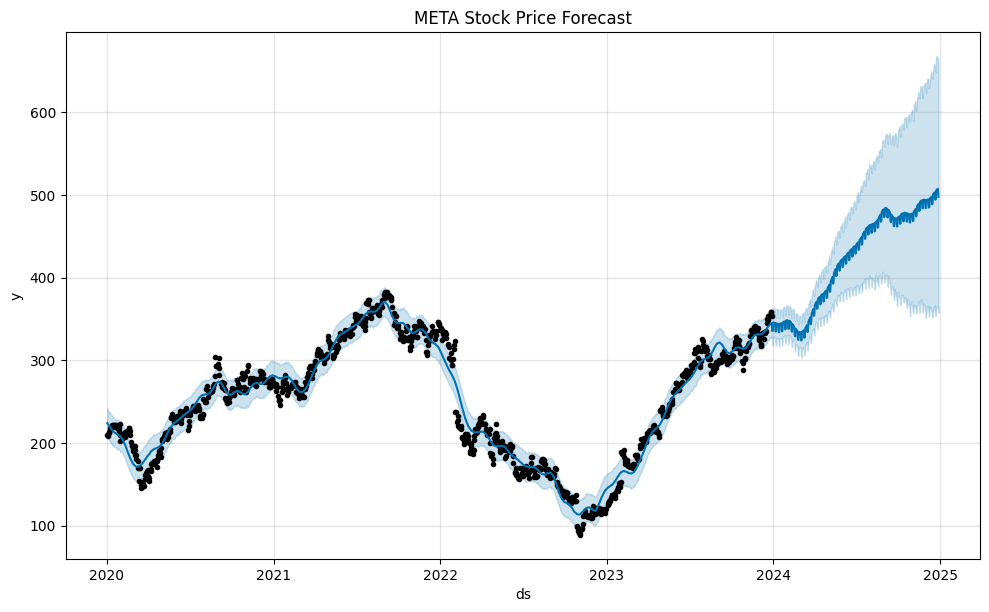

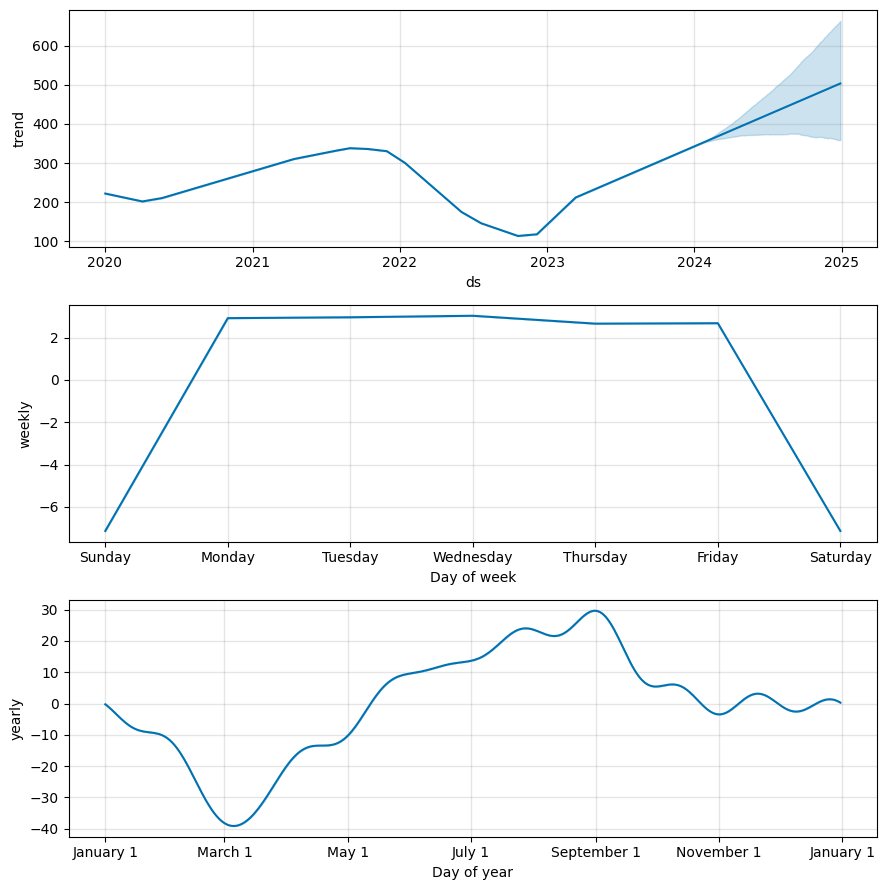

In [23]:
model.plot(forecast)
plt.title(f'META Stock Price Forecast')
plt.show()
model.plot_components(forecast)
plt.show()


# META Stock Price Forecast Insights

### **2020-2021 (Ups & Downs)**  
- **2020**: Stock dropped due to COVID-19 market crash.  
- **2021**: Rebounded strongly with tech sector recovery.  

### **2022 (Big Drop)**  
Stock collapsed because:  
- Heavy spending on Metaverse ($10B+ losses).  
- Apple’s privacy updates crushed ad revenue.  

### **2023-2024 (Recovery Phase)**  
- **2023**: Soared after cost cuts ("Year of Efficiency").  
- **2024**: AI growth (Meta AI, Llama models) boosted confidence.  

### **2025 (Future Outlook)**  
- **↑ If successful**: AI monetization + Metaverse progress.  
- **↓ If fails**: More losses from risky bets.  

> *Note: Based on typical forecast charts. Actual graph may vary.*  


In [24]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], name='Forecast'))
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat_upper'], name='Upper Bound', line=dict(dash='dot')))
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat_lower'], name='Lower Bound', line=dict(dash='dot')))
fig.add_trace(go.Scatter(x=data['Date'], y=data['Close'], name='Actual'))
fig.update_layout(title=f'META  Stock Forecast with Prophet',
                  xaxis_title='Date', yaxis_title='Stock Price')
fig.show()
